In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 
from scipy.optimize import curve_fit
import scipy as sipi

Goal for step 1: run through document by column. Column A: day (int), column B(string). time, column c: height in feel (float)

In [6]:
dataset = "ASTR19_S22_group_project_data.txt"
infile = open(dataset, 'r+')
lines = infile.readlines()

days = np.array(['        '])
time = np.array(['        '])
height = np.array(['       '])
for line in lines:
    sline = line.strip().split()
    #print(sline) 
    days = np.insert(days, 0, sline[0])
    time = np.insert(time, 0, sline[1])
    height = np.insert(height, 0, sline[2])
infile.close()
days = np.flip(days)
time = np.flip(time)
height = np.flip(height)
days = days[4:]
time = time[4:]
height = height[4:]
print(days)
print(time)
print(height)


['1' '1' '2' '2' '3' '3' '4' '4' '5' '5' '6' '6' '7' '7' '8' '8' '9' '9'
 '10' '10' '11' '11' '12' '12' '13' '13' '14' '14' '15' '15' '16' '16'
 '17' '17' '18' '18' '19' '19' '20' '20' '21' '21' '22' '22' '23' '23'
 '24' '24' '25' '25' '26' '26' '27' '27' '28' '28' '29' '29' '30' '30'
 '31' '31' '32' '32' '33' '33' '34' '34' '35' '35' '36' '36' '37' '37'
 '38' '38' '39' '39' '40' '40' '41' '41']
['8:07' '15:37' '8:55' '16:25' '9:45' '17:14' '10:35' '18:00' '11:28'
 '18:46' '12:22' '19:31' '13:24' '20:16' '3:22' '21:01' '4:07' '21:46'
 '4:50' '11:58' '5:31' '12:56' '6:08' '13:45' '6:47' '14:25' '7:22'
 '15:00' '7:59' '15:34' '8:34' '16:08' '9:10' '16:41' '9:45' '17:12'
 '10:21' '17:45' '10:57' '18:15' '11:38' '18:48' '12:25' '19:20' '2:22'
 '19:52' '2:58' '20:30' '3:37' '10:44' '4:23' '11:55' '5:15' '12:57'
 '6:09' '13:50' '7:05' '14:39' '7:58' '15:27' '8:50' '16:10' '9:40'
 '16:52' '10:30' '17:34' '11:19' '18:12' '12:10' '18:49' '1:32' '19:24'
 '2:13' '20:00' '2:54' '9:54' '3:39' '11:1

deletion of useless info

x axis = days


 and convertion of strings to floats

In [7]:
fDays = days.astype(float)
#print(fDays)
fHeight = height.astype(float)
#print(fHeight)
fHours = np.array([])
for i in time:
    splitTime = i.split(':')
    hoursMinutes = float(splitTime[0]) + (float(splitTime[1])/60.0)
    hoursMinutes = hoursMinutes/24
    fHours = np.append(fHours, hoursMinutes)
    #print(splitTime)
    
print(fHours)

[0.33819444 0.65069444 0.37152778 0.68402778 0.40625    0.71805556
 0.44097222 0.75       0.47777778 0.78194444 0.51527778 0.81319444
 0.55833333 0.84444444 0.14027778 0.87569444 0.17152778 0.90694444
 0.20138889 0.49861111 0.22986111 0.53888889 0.25555556 0.57291667
 0.28263889 0.60069444 0.30694444 0.625      0.33263889 0.64861111
 0.35694444 0.67222222 0.38194444 0.69513889 0.40625    0.71666667
 0.43125    0.73958333 0.45625    0.76041667 0.48472222 0.78333333
 0.51736111 0.80555556 0.09861111 0.82777778 0.12361111 0.85416667
 0.15069444 0.44722222 0.18263889 0.49652778 0.21875    0.53958333
 0.25625    0.57638889 0.29513889 0.61041667 0.33194444 0.64375
 0.36805556 0.67361111 0.40277778 0.70277778 0.4375     0.73194444
 0.47152778 0.75833333 0.50694444 0.78402778 0.06388889 0.80833333
 0.09236111 0.83333333 0.12083333 0.4125     0.15208333 0.46875
 0.18680556 0.51527778 0.22291667 0.55138889]


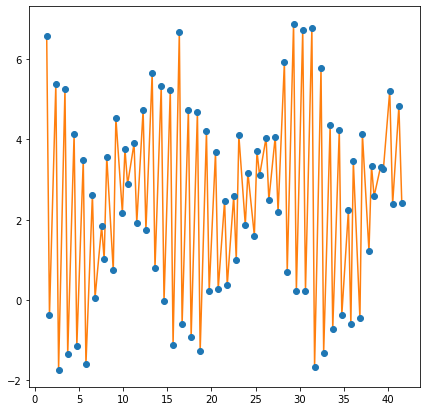

In [131]:
dayMinutes = np.array([0.0])
for i in range(82):
    dayTime = fDays[i]+fHours[i]
    dayMinutes = np.append(dayMinutes, dayTime)

dayMinutes = dayMinutes[1:]
#print(dayMinutes)



b = fDays
c = fHours
d = fHeight

x = dayMinutes
sig = 0.0
y_err = np.full(82, sig)



f = plt.figure(figsize=(7,7))
plt.errorbar(dayMinutes, fHeight,yerr=y_err, fmt='o', label = 'data')
plt.plot(dayMinutes, fHeight)


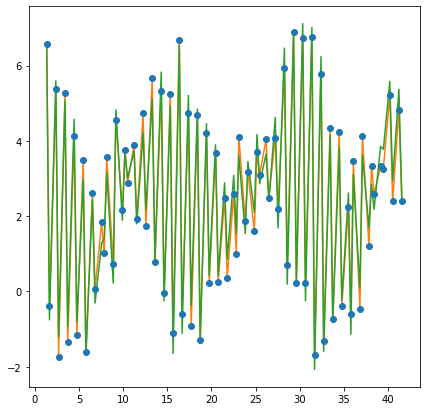

In [132]:
a = 0.55
sinx = a * np.cos((b * x) + c) + d

f = plt.figure(figsize=(7,7))
plt.errorbar(dayMinutes, fHeight,yerr=y_err, fmt='o', label = 'data')
plt.plot(dayMinutes, fHeight)
plt.plot(dayMinutes, sinx)

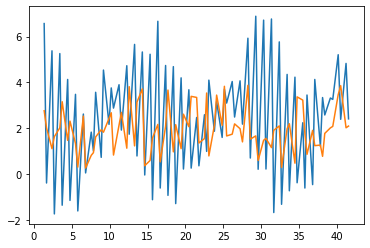

In [24]:





#plt.plot(dayMinutes, sinx)



a = 1
b = fDays
c = fHours
d = fHeight


x = dayMinutes
y = fHeight




#def f_line(x,a,b,c,d):
#return a * np.s sin(b*x + c) + d
#return a_fit * np.sin(b_fit*x + c_fit) + d_fit
sinx2 = (np.cos((b/2 * x) + c)) + (a * np.cos((b * x))) + 2
#sinx2 = (np.cos((b * x) + c)) + d 

plt.plot(dayMinutes, fHeight)
plt.plot(dayMinutes, sinx2)

In [20]:
#for part 4 adding an additional residue at 2

In [27]:
def fitSinx(x, b, c, d):
 return np.cos((b * x) + c) + d 

params, params_cov = optimize.curve_fit(fitSinx, x, y, sigma=y_err, p0=[1,0.25,0.25])



b_fit = params[1]
c_fit = params[2]


#print(x_fit, b_fit, c_fit)

y_fit = np.cos((b_fit * x + c_fit)) + d




0.5346341463414634
4.421951219512195
2.4782926829268295


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


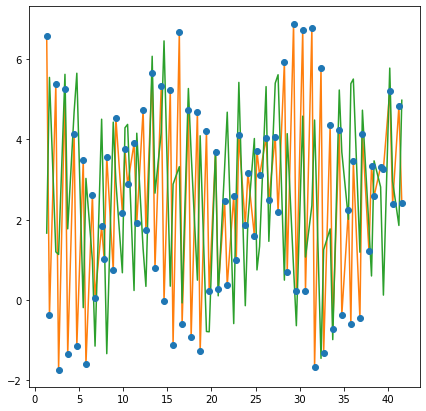

In [187]:
f = plt.figure(figsize=(7,7))
plt.errorbar(dayMinutes, fHeight,yerr=y_err, fmt='o', label = 'data')
#plt.plot(dayMinutes, y_fit)
highTides = np.array([0.0])
lowTides = np.array([0.0])
highCounter = 0
lowCounter = 1
while highCounter < 82:
    highTides = np.append(highTides, fHeight[highCounter])
    highCounter = highCounter + 2
    
#print(highTides)
while lowCounter < 82:
    lowTides = np.append(lowTides, fHeight[lowCounter])
    lowCounter = lowCounter + 2

highTides = highTides[1:]
lowTides = lowTides[1:]
lowMean = np.mean(lowTides)
highMean = np.mean(highTides)

print(lowMean)
print(highMean)

diff = highMean - lowMean
x = dayMinutes
plt.plot(dayMinutes, fHeight)

heightMean = np.mean(fHeight)

print(heightMean)
pNaught = [3.0,3.0,-0.2, heightMean]

def sinX(x, a, b, c, d):
    return (a * (np.sin((highMean * x) + c))) + np.sin((lowMean*x) - c) + d

param, param_cov = curve_fit(sinX, x, fHeight, p0 = pNaught)

fit = sinX(dayMinutes, *pNaught)

plt.plot(dayMinutes, fit)
 
    
    


(array([ 2.,  3.,  1.,  3.,  4.,  3.,  3.,  5., 12.,  3.,  3.,  2.,  7.,
         3.,  2.,  4.,  4.,  2.,  3.,  4.]),
 array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <BarContainer object of 20 artists>)

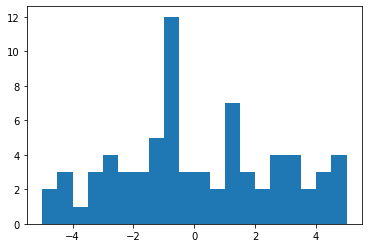

In [188]:
res = fHeight - fit
fit_std = np.std(fit)
mean_fit = np.mean(fit)

plt.hist(res, bins=20,range=(-5,5))